In [38]:
import numpy as np
import matplotlib.pyplot as plt

# For inline plotting in Jupyter:
%matplotlib inline

In [39]:
def generate_left_figure_data(n_points=400):
    """
    Generate data that loosely mimics the left t-SNE figure distribution:
    a scattered 'dual-cluster' swirl with overlapping red (ACDC) and blue (YU).
    """
    np.random.seed(42)
    
    # Red clusters
    red_cluster_centers = [(-20,  5), (0, 0), (25, 15), (20, -10)]
    red_data = []
    for cx, cy in red_cluster_centers:
        cluster_size = n_points // len(red_cluster_centers)
        x = np.random.normal(cx, 5, cluster_size)
        y = np.random.normal(cy, 5, cluster_size)
        red_data.append(np.column_stack((x, y)))
    red_data = np.vstack(red_data)
    
    # Blue clusters
    blue_cluster_centers = [(-10, -5), (10, 10), (15, 0), (0, -15)]
    blue_data = []
    for cx, cy in blue_cluster_centers:
        cluster_size = n_points // len(blue_cluster_centers)
        x = np.random.normal(cx, 5, cluster_size)
        y = np.random.normal(cy, 5, cluster_size)
        blue_data.append(np.column_stack((x, y)))
    blue_data = np.vstack(blue_data)
    
    return red_data, blue_data

In [40]:
def generate_right_figure_data(n_points=400):
    """
    Generate data that more closely overlaps for red and blue.
    The blue points form a slightly noisy arc (horseshoe),
    while the red points form a partial ring/circle so they overlap.
    """
    np.random.seed(24)
    
    # Blue: horseshoe (arc) shape with noise
    angles = np.linspace(-np.pi/2, np.pi/2, n_points)
    radius = 30
    x_blue = radius * np.cos(angles) + np.random.normal(0, 3, n_points)
    y_blue = radius * np.sin(angles) + np.random.normal(0, 3, n_points)
    blue_data = np.column_stack((x_blue, y_blue))
    
    # Red: scattered in a ring so there's overlap
    # We'll select random angles from 0 to 2π and random radii from 5 to 25
    # so that the red points intersect with part of the arc.
    np.random.seed(99)
    angles_red = np.random.uniform(0, 2*np.pi, n_points)
    radii_red = np.random.uniform(5, 25, n_points)
    x_red = radii_red * np.cos(angles_red) + np.random.normal(0, 3, n_points)
    y_red = radii_red * np.sin(angles_red) + np.random.normal(0, 3, n_points)
    red_data = np.column_stack((x_red, y_red))
    
    return red_data, blue_data

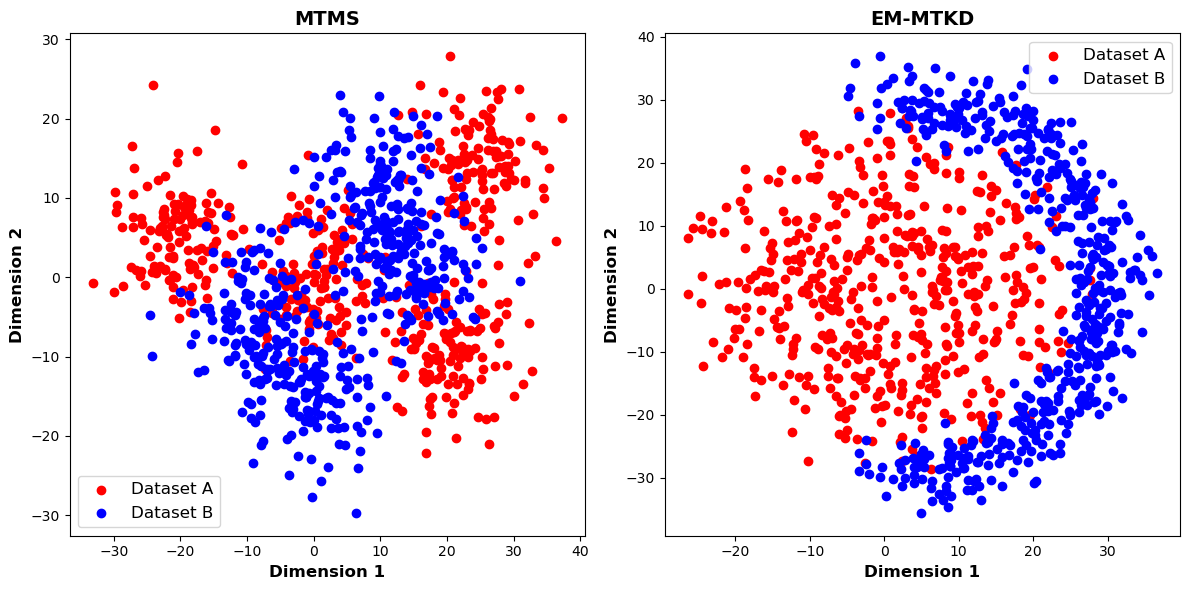

In [41]:
# Generate both sets of data
red_left, blue_left = generate_left_figure_data(n_points=500)
red_right, blue_right = generate_right_figure_data(n_points=500)

# Create subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Left figure
axes[0].scatter(red_left[:, 0], red_left[:, 1], c='red', label='Dataset A')
axes[0].scatter(blue_left[:, 0], blue_left[:, 1], c='blue', label='Dataset B')
axes[0].set_title('MTMS', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Dimension 1', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Dimension 2', fontsize=12, fontweight='bold')
axes[0].legend(fontsize=12)

# Right figure
axes[1].scatter(red_right[:, 0], red_right[:, 1], c='red', label='Dataset A')
axes[1].scatter(blue_right[:, 0], blue_right[:, 1], c='blue', label='Dataset B')
axes[1].set_title('EM-MTKD', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Dimension 1', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Dimension 2', fontsize=12, fontweight='bold')
axes[1].legend(fontsize=12)

plt.tight_layout()
plt.savefig("46_fig_3_tsne.svg", format="svg")
plt.show()